In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('/kaggle/input/hospital-bed-occupancy/bed occupancy.csv',parse_dates=['Date'])
data.head()

,Date,Occupancy,Day_of_Week,Month,Year,Holiday,Prev_Occupancy,Prev_2_Occupancy
0,2022-01-01,120,5,1,2022,1,115,110
1,2022-01-02,130,6,1,2022,1,120,115
2,2022-01-03,125,0,1,2022,0,130,120
3,2022-01-04,140,1,1,2022,0,125,130
4,2022-01-05,145,2,1,2022,0,140,125


In [3]:
# Feature engineering
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Holiday'] = data['Date'].isin(['2022-12-25', '2022-01-01']).astype(int) 


<ipython-input-3-151f82b6545f>:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data['Holiday'] = data['Date'].isin(['2022-12-25', '2022-01-01']).astype(int)


In [4]:
# Lag Features: Previous day's occupancy
data['Prev_Occupancy'] = data['Occupancy'].shift(1)
data['Prev_2_Occupancy'] = data['Occupancy'].shift(2)

# Remove rows with missing values (for simplicity)
data.dropna(inplace=True)

In [5]:
# Define features and target
X = data[['Day_of_Week', 'Month', 'Year', 'Holiday', 'Prev_Occupancy', 'Prev_2_Occupancy']]
y = data['Occupancy']

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for distance-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [8]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 5.66
Root Mean Squared Error (RMSE): 7.25


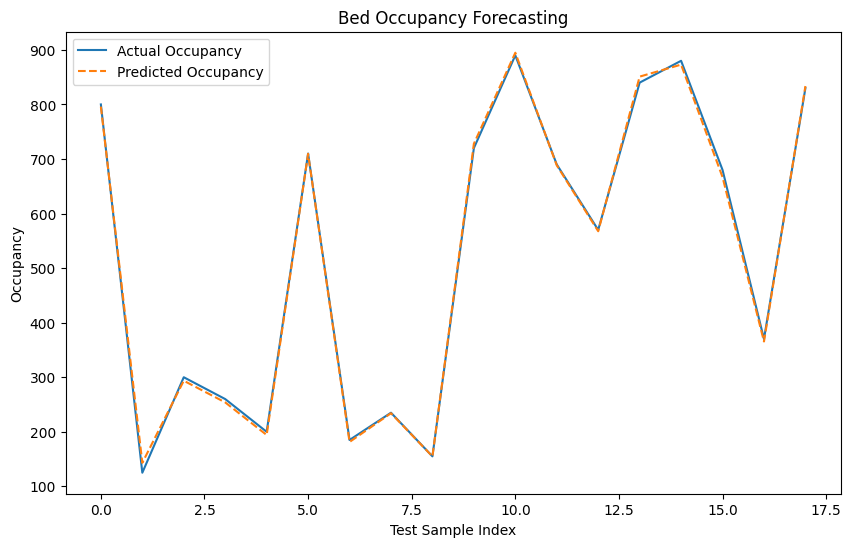

In [9]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Occupancy')
plt.plot(predictions, label='Predicted Occupancy', linestyle='--')
plt.title('Bed Occupancy Forecasting')
plt.xlabel('Test Sample Index')
plt.ylabel('Occupancy')
plt.legend()
plt.show()